# What does high bookmaker informedness (BM) mean for positive predictive value (PPV) or negative predictive value (NPV)?

Demonstrate that if BM is high, at least one of PPV and NPV must be high as well.

A similar argument can be made for MK. If MK is high, at least one of TPR and TNR must be high.

# Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Set true positive rate (TPR) and true negative rate (TNR)

In [2]:
tpr_val = 0.9
tnr_val = 0.8

Calculate bookmaker informedness (BM) and balanced accuracy (BA)

In [3]:
bm_val = tpr_val + tnr_val - 1
ba_val = (tpr_val + tnr_val) / 2

Scan different prevalences

In [4]:
step = 0.01
prev = np.arange(step, 1, step)
entries = len(prev)

TPR/TNR and BM/BA are independent of prevalence.

In [5]:
tpr = np.array([tpr_val]*entries)
tnr = np.array([tnr_val]*entries)
bm = np.array([bm_val]*entries)
ba = np.array([ba_val]*entries)

Calculate PPV and NPV for different prevalences

In [6]:
ppv = (tpr_val * prev) / ((tpr_val * prev) + ((1 - tnr_val) * (1- prev)))
npv = (tnr_val * (1 - prev)) / (((1 - tpr_val) * prev) + ((tnr_val) * (1- prev)))

# Visualize

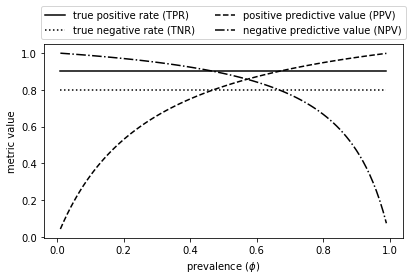

In [7]:
plt.plot(prev, tpr, label='true positive rate (TPR)', c='k')
plt.plot(prev, tnr, label='true negative rate (TNR)', c='k', linestyle='dotted')
plt.plot(prev, ppv, label='positive predictive value (PPV)', c='k', linestyle='dashed')
plt.plot(prev, npv, label='negative predictive value (NPV)', c='k', linestyle='dashdot')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0),
          ncol=2)
plt.xlabel(r'prevalence ($\phi$)')
plt.ylabel('metric value')

plt.tight_layout()
plt.savefig('high_BM_four_basic_rates.eps')

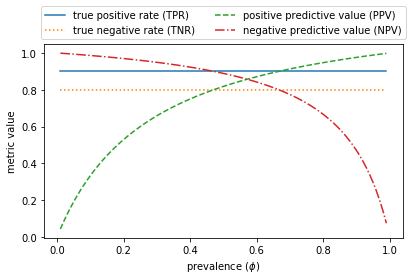

In [8]:
plt.plot(prev, tpr, label='true positive rate (TPR)')
plt.plot(prev, tnr, label='true negative rate (TNR)', linestyle='dotted')
plt.plot(prev, ppv, label='positive predictive value (PPV)', linestyle='dashed')
plt.plot(prev, npv, label='negative predictive value (NPV)', linestyle='dashdot')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0),
          ncol=2)
plt.xlabel(r'prevalence ($\phi$)')
plt.ylabel('metric value')

plt.tight_layout()
plt.savefig('high_BM_four_basic_rates_colored.eps')

# Check that equations for TPR and TNR in the manuscript are correct

This refers to the equations where TPR and TNR are calculated from PPV, NPV and bias.
Currently, they are Equations 38 and 39.

In [9]:
bias = tpr * prev + (1 - tnr) * (1 - prev)

In [10]:
ppv * bias / ((ppv * bias ) + ((1 - npv) * ( 1- bias )))

array([0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9])

In [11]:
(npv * (1 - bias)) / (((1 - ppv) * bias) + ((npv) * (1- bias)))

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])

We can reproduce the input value for TPR and TNR, the equations are correct.